<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Dacon_%EC%8B%A0%EC%9A%A9_%EC%98%88%EC%B8%A1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import itertools

In [ ]:
pip install plotly.express

In [ ]:
pip install pywaffle

     |████████████████████████████████| 532kB 8.6MB/s 


In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 252kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# **신용카드 사용자 연체 예측 AI 경진대회(Dacon)**

*   2021-04-10부터 시작(본인이)
*   신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 
*   신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측
*   이번 대회는 특이하게 심사기준이 Logloss(손실함수)이다.

index


gender: 성별


car: 차량 소유 여부


reality: 부동산 소유 여부


child_num: 자녀 수


income_total: 연간 소득


income_type: 소득 분류


							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']



edu_type: 교육 수준


							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



family_type: 결혼 여부


							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']



house_type: 생활 방식


							['Municipal apartment', 'House / apartment', 'With parents',

							

							 'Co-op apartment', 'Rented apartment', 'Office apartment']



DAYS_BIRTH: 출생일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



DAYS_EMPLOYED: 업무 시작일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

							양수 값은 고용되지 않은 상태를 의미함



FLAG_MOBIL: 핸드폰 소유 여부


work_phone: 업무용 전화 소유 여부


phone: 전화 소유 여부


email: 이메일 소유 여부


occyp_type: 직업 유형													


family_size: 가족 규모


begin_month: 신용카드 발급 월
			

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







credit: 사용자의 신용카드 대금 연체를 기준의 신용도


							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함


In [70]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/test.csv')

In [116]:
sample = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/sample_submission.csv')

In [8]:
print(f'train shape:{train.shape}, test shape:{test.shape}')

train shape:(26457, 20), test shape:(10000, 19)


In [ ]:
data = pd.concat(['train', 'test'], axis=0)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


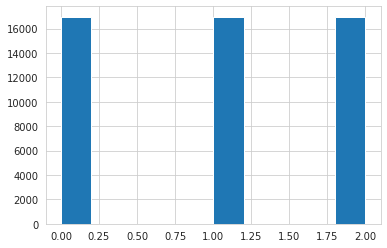

In [11]:
train.credit.hist()

In [ ]:
train.credit.value_counts()

2    16968
1     6267
0     3222
Name: credit, dtype: int64

In [71]:
from sklearn.utils import resample
train.credit = train.credit.astype(int)

In [72]:
a_credit = train[train.credit == 0]
b_credit = train[train.credit == 1]
c_credit = train[train.credit == 2]
a_oversampled = resample(a_credit, replace=True, n_samples=len(c_credit), random_state=123)
b_oversampled = resample(b_credit, replace=True, n_samples=len(c_credit), random_state=123)
train = pd.concat([c_credit, a_oversampled, b_oversampled], axis=0)

In [ ]:
data = pd.concat([train,test], axis=0)

In [12]:
train.credit.value_counts()

2    16968
1    16968
0    16968
Name: credit, dtype: int64

In [13]:
train.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       15570
family_size          0
begin_month          0
credit               0
dtype: int64

In [73]:
train_occyp_type = train['occyp_type']

In [86]:
test_occyp_type = test['occyp_type']

In [74]:
train = train.drop(['occyp_type'], axis=1)

In [87]:
test = test.drop(['occyp_type'], axis=1)

In [75]:
for i in train.select_dtypes(include='object'):
  lencoders=LabelEncoder()
  train[i] = lencoders.fit_transform(train[i])

In [88]:
for i in test.select_dtypes(include='object'):
  lencoders=LabelEncoder()
  test[i] = lencoders.fit_transform(test[i])

In [76]:
train = pd.concat([train_occyp_type, train], axis=1)

In [89]:
test = pd.concat([test_occyp_type, test], axis=1)

In [77]:
train_notnull = train[train['occyp_type'].notnull()]
test_null = train[train['occyp_type'].isnull()]
train_notnull['occyp_type'] = lencoders.fit_transform(train_notnull['occyp_type'])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [78]:
Y=train_notnull['occyp_type']
X=train_notnull.drop(['occyp_type'], axis=1)

model_rf = RandomForestClassifier(n_estimators=500, max_depth=10)
model_rf.fit(X,Y)
predict = model_rf.predict(test_null.loc[:,'index':])

In [80]:
test_null['occyp_type'] = predict
## 결측치 처리완료(랜덤포레스트 예측값으로)

In [83]:
train = pd.concat([train_notnull, test_null], axis=0)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50904 entries, 2 to 10733
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occyp_type     50904 non-null  int64  
 1   index          50904 non-null  int64  
 2   gender         50904 non-null  int64  
 3   car            50904 non-null  int64  
 4   reality        50904 non-null  int64  
 5   child_num      50904 non-null  int64  
 6   income_total   50904 non-null  float64
 7   income_type    50904 non-null  int64  
 8   edu_type       50904 non-null  int64  
 9   family_type    50904 non-null  int64  
 10  house_type     50904 non-null  int64  
 11  DAYS_BIRTH     50904 non-null  int64  
 12  DAYS_EMPLOYED  50904 non-null  int64  
 13  FLAG_MOBIL     50904 non-null  int64  
 14  work_phone     50904 non-null  int64  
 15  phone          50904 non-null  int64  
 16  email          50904 non-null  int64  
 17  family_size    50904 non-null  float64
 18  begin_

In [90]:
train_notnull = test[test['occyp_type'].notnull()]
test_null = test[test['occyp_type'].isnull()]
train_notnull['occyp_type'] = lencoders.fit_transform(train_notnull['occyp_type'])

Y=train_notnull['occyp_type']
X=train_notnull.drop(['occyp_type'], axis=1)

model_rf = RandomForestClassifier(n_estimators=500, max_depth=10)
model_rf.fit(X,Y)
predict = model_rf.predict(test_null.loc[:,'index':])

test_null['occyp_type'] = predict

test = pd.concat([train_notnull, test_null], axis=0)
## test데이터 결측치 처리완료(랜덤포레스트 예측값으로)

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 9998
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occyp_type     10000 non-null  int64  
 1   index          10000 non-null  int64  
 2   gender         10000 non-null  int64  
 3   car            10000 non-null  int64  
 4   reality        10000 non-null  int64  
 5   child_num      10000 non-null  int64  
 6   income_total   10000 non-null  float64
 7   income_type    10000 non-null  int64  
 8   edu_type       10000 non-null  int64  
 9   family_type    10000 non-null  int64  
 10  house_type     10000 non-null  int64  
 11  DAYS_BIRTH     10000 non-null  int64  
 12  DAYS_EMPLOYED  10000 non-null  int64  
 13  FLAG_MOBIL     10000 non-null  int64  
 14  work_phone     10000 non-null  int64  
 15  phone          10000 non-null  int64  
 16  email          10000 non-null  int64  
 17  family_size    10000 non-null  float64
 18  begin_m

**occyp_type columns이 결측치가 있는데...**
> occyp_type 이 컬럼은 직업별 시각화를 통해서, income_total을 통해 결측치 처리

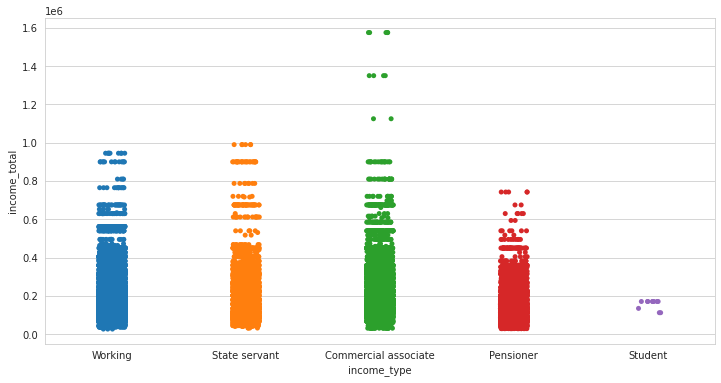

In [14]:
plt.figure(figsize=(12,6))
sns.stripplot(x='income_type', y=train['income_total'], data=train)

In [ ]:
train.groupby('income_type')['income_total'].median()

income_type
Commercial associate    189000.0
Pensioner               135000.0
State servant           180000.0
Student                 171000.0
Working                 157500.0
Name: income_total, dtype: float64

In [ ]:
train.groupby('occyp_type')['income_total'].median()

occyp_type
Accountants              180000.0
Cleaning staff           135000.0
Cooking staff            135000.0
Core staff               171000.0
Drivers                  202500.0
HR staff                 157500.0
High skill tech staff    180000.0
IT staff                 171000.0
Laborers                 162000.0
Low-skill Laborers       112500.0
Managers                 247500.0
Medicine staff           155250.0
Private service staff    180000.0
Realty agents            270000.0
Sales staff              157500.0
Secretaries              135000.0
Security staff           157500.0
Waiters/barmen staff     157500.0
Name: income_total, dtype: float64

# mode로 채워보자(결측치)

In [ ]:
train['occyp_type'].fillna(train['occyp_type'].mode()[0], inplace=True)
test['occyp_type'].fillna(train['occyp_type'].mode()[0], inplace=True)
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [22]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2
6,6,0,0,0,0,315000.0,4,4,2,1,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2
8,8,1,1,1,1,180000.0,0,1,1,1,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2
9,9,0,0,1,0,103500.0,4,4,1,1,-15785,-1308,1,0,0,0,Medicine staff,2.0,-5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1747,0,0,1,1,135000.0,4,4,1,1,-14948,-4881,1,0,0,0,Laborers,3.0,-14.0,1
18621,18621,0,1,1,1,135000.0,4,4,1,4,-15428,-1723,1,0,0,0,Accountants,3.0,-55.0,1
14223,14223,0,0,0,0,135000.0,2,4,1,1,-20875,-3785,1,0,0,0,High skill tech staff,2.0,-4.0,1
168,168,0,0,0,0,157500.0,4,4,1,1,-19702,-9870,1,1,1,0,NaN,2.0,-21.0,1


In [21]:
train.select_dtypes(include='object')

,occyp_type
2,Managers
4,Managers
6,Core staff
8,NaN
9,Medicine staff
...,...
1747,Laborers
18621,Accountants
14223,High skill tech staff
168,NaN


In [ ]:
data['occyp_type'].fillna(data['occyp_type'].mode()[0], inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for i in train.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  train[i] = lencoders[i].fit_transform(train[i])

for i in test.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  test[i] = lencoders[i].fit_transform(test[i])

TypeError: ignored

In [ ]:
lencoders = {}
for i in data.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  data[i] = lencoders[i].fit_transform(data[i])

In [ ]:
target = train['credit']

In [ ]:
train = train.drop(['credit'], axis=1)

In [ ]:
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3-Q1
print(IQR)

gender                1.0
car                   1.0
reality               1.0
child_num             1.0
income_total     103500.0
income_type           3.0
edu_type              3.0
family_type           0.0
house_type            0.0
DAYS_BIRTH         7011.0
DAYS_EMPLOYED      2687.0
FLAG_MOBIL            0.0
work_phone            0.0
phone                 1.0
email                 0.0
occyp_type            2.0
family_size           1.0
begin_month          28.0
credit                2.0
dtype: float64


In [ ]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

In [ ]:
data.shape

(13216, 19)

In [92]:
x = train.drop(['credit'], axis=1)
y = train['credit']

In [93]:
from sklearn.preprocessing import robust_scale

In [95]:
scaler = robust_scale(x)
x = pd.DataFrame(scaler, columns=x.columns)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=25)

In [150]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, roc_auc_score, plot_confusion_matrix, log_loss

In [198]:
model_rf = RandomForestClassifier(n_jobs=-1)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_rf))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy: 0.9215778720729216
cohen_kappa_score: 0.8823721203946273
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4268
           1       0.89      0.94      0.91      4207
           2       0.93      0.83      0.88      4251

    accuracy                           0.92     12726
   macro avg       0.92      0.92      0.92     12726
weighted avg       0.92      0.92      0.92     12726



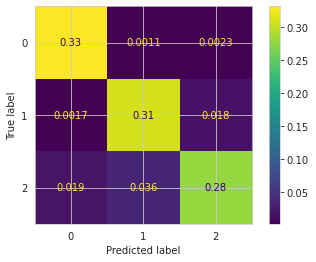

In [135]:
plot_confusion_matrix(model_rf, x_test, y_test, normalize='all')

In [181]:
model_xgb = xgb.XGBClassifier(n_jobs=-1, max_depth=100)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_xgb))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

accuracy: 0.9273927392739274
cohen_kappa_score: 0.8910896727929697
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4268
           1       0.91      0.93      0.92      4207
           2       0.93      0.86      0.89      4251

    accuracy                           0.93     12726
   macro avg       0.93      0.93      0.93     12726
weighted avg       0.93      0.93      0.93     12726



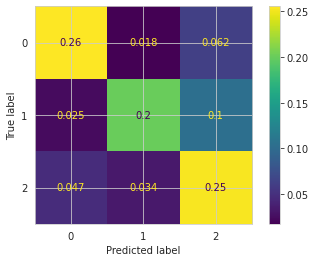

In [102]:
plot_confusion_matrix(model_xgb, x_test, y_test, normalize='all')

In [136]:
model_rf_proba = model_rf.predict_proba(x_test)
log_loss(y_test, model_rf_proba)

0.2776769294074857

In [128]:
model_xgb_proba = model_xgb.predict_proba(x_test)
log_loss(y_test, model_xgb_proba)

1.0085083578562335

In [192]:
sample.iloc[:,1:]=0

In [193]:
for fold in range(5):
   sample.iloc[:,1:] += model_xgb[fold].predict_proba(test)/5

TypeError: ignored

In [191]:
sample.to_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/2021-04-13 3차', index=False) 

In [190]:
sample.set_index('index').values.mean()
## 1차 0.333333333

0.3333333333333333

In [ ]:
##########################2차############################################

In [157]:
test_x = test

In [199]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(x_train, y_train)):
        X_train, X_val = x_train.iloc[train_index], x_train.iloc[val_index]
        Y_train, Y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        clf.fit(X_train, Y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(Y_val), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(model_xgb)

FOLD 0 : logloss:0.2898488063588912
FOLD 1 : logloss:0.278565402351145


KeyboardInterrupt: ignored

In [170]:
sample.loc[:,1:] = my_submission

In [176]:
sample

,index,0,1,2
0,26457,0.178,0.286,0.536
1,26458,0.182,0.280,0.538
2,26459,0.176,0.270,0.554
3,26460,0.174,0.282,0.544
4,26461,0.232,0.254,0.514
...,...,...,...,...
9995,36452,0.224,0.302,0.474
9996,36453,0.224,0.262,0.514
9997,36454,0.204,0.314,0.482
9998,36455,0.222,0.310,0.468


In [179]:
sample.to_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/2021-04-13_3차.csv', index=False) 

In [ ]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [ ]:
params = {'max_depth': 3,
         'eta': 0.1,
         'eval_metric': 'logloss',
         'early_stoppings': 100}
num_rounds = 400

In [ ]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.576442	eval-logloss:0.572333
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.478854	eval-logloss:0.47044
[2]	train-logloss:0.393456	eval-logloss:0.382746
[3]	train-logloss:0.319749	eval-logloss:0.306651
[4]	train-logloss:0.252245	eval-logloss:0.237242
[5]	train-logloss:0.191464	eval-logloss:0.175001
[6]	train-logloss:0.134994	eval-logloss:0.116575
[7]	train-logloss:0.078525	eval-logloss:0.059048
[8]	train-logloss:-0.133601	eval-logloss:-0.087155
[9]	train-logloss:-0.487124	eval-logloss:-0.35503
[10]	train-logloss:-0.67172	eval-logloss:-0.574017
[11]	train-logloss:-0.996799	eval-logloss:-0.910523
[12]	train-logloss:-1.41763	eval-logloss:-1.28232
[13]	train-logloss:-1.81502	eval-logloss:-1.74935
[14]	train-logloss:-2.26857	eval-logloss:-2.45983
[15]	train-logloss:-2.57016	eval-logloss:-2.72317
[16]	train-logloss:-3.07277	eval-logloss:-3.15788
[17]	